In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir ~/.kaggle

!cp drive/MyDrive/kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d andrewmvd/cyberbullying-classification

!unzip cyberbullying-classification.zip

  0% 0.00/2.82M [00:00<?, ?B/s]
100% 2.82M/2.82M [00:00<00:00, 182MB/s]
Archive:  cyberbullying-classification.zip
  inflating: cyberbullying_tweets.csv  


In [ ]:
!pip install -q git+https://github.com/gmihaila/ml_things.git

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 2.9 MB/s eta 0:00:00


In [ ]:
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report, accuracy_score

from ml_things import plot_dict, plot_confusion_matrix, fix_text
import re
import nltk
import spacy
import string
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None

In [ ]:
df = pd.read_csv('/content/cyberbullying_tweets.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.isna().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


tweet_text            0
cyberbullying_type    0
dtype: int64

In [ ]:
df.duplicated().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


36

In [ ]:
df = df[~df.duplicated()]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#Data Preprocessing

##Remove Punctuation

In [ ]:
#Remove Punctuation
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##Stemming Data

In [ ]:
#Stemming Data
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##Cleaning Data

In [ ]:
df = df[df['cyberbullying_type']!="other_cyberbullying"]
dt = df
dt["text"] = df["tweet_text"].astype(str)
dt["text"] = dt["text"].str.lower()
dt["text"] = dt["text"].apply(lambda text: remove_punctuation(text))
dt["text"] = dt["text"].apply(lambda text: stem_words(text))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##Count Words

In [ ]:
from collections import Counter
cnt = Counter()
for text in dt["text"].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(50)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[('the', 28426),
 ('a', 22294),
 ('to', 20913),
 ('and', 20282),
 ('i', 17540),
 ('you', 17069),
 ('of', 13990),
 ('in', 13940),
 ('is', 12614),
 ('that', 11337),
 ('bulli', 10215),
 ('it', 9951),
 ('school', 9093),
 ('are', 8518),
 ('for', 7818),
 ('be', 7415),
 ('fuck', 7289),
 ('me', 6882),
 ('not', 6599),
 ('wa', 6108),
 ('my', 5923),
 ('like', 5807),
 ('but', 5712),
 ('thi', 5690),
 ('joke', 5484),
 ('on', 5467),
 ('girl', 5404),
 ('who', 5368),
 ('dumb', 5309),
 ('they', 5213),
 ('nigger', 5118),
 ('high', 5082),
 ('your', 4929),
 ('with', 4899),
 ('have', 4757),
 ('muslim', 4745),
 ('all', 4597),
 ('about', 4516),
 ('so', 4498),
 ('rape', 4436),
 ('peopl', 4430),
 ('as', 4345),
 ('gay', 4265),
 ('just', 3999),
 ('u', 3929),
 ('he', 3869),
 ('call', 3774),
 ('if', 3759),
 ('do', 3602),
 ('one', 3468)]

##Remove Common Words

In [ ]:
#Remove 10 most common words
FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
def remove_freqwords(text):
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##Remove Rare Words

In [ ]:
#Remove Word that appear <= 10
RAREWORDS = set([w for (w, wc) in cnt.most_common() if wc <=10])
def remove_rarewords(text):
    return " ".join([word for word in str(text).split() if word not in RAREWORDS])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##Remove Rare and Common Words

In [ ]:
#word preprocessing
dt["text"] = dt["text"].apply(lambda text: remove_rarewords(text))
dt["text"] = dt["text"].apply(lambda text: remove_freqwords(text))

print(dt.head(5))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


                                          tweet_text cyberbullying_type  \
0  In other words #katandandre, your food was cra...  not_cyberbullying   
1  Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying   
2  @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying   
3  @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying   
4  @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying   

                                                text  
0             other word katandandr your food wa mkr  
1                         whi so white mkr today etc  
2                           classi whore or more red  
3  p thank for head up but not too concern about ...  
4  thi an isi account pretend be kurdish account ...  


##Remove Null Value after Preprocess

In [ ]:
dt["text_length"] = [len(word.split()) for word in dt["text"]]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
(dt['text_length'] == 0).sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


195

In [ ]:
dt = dt[dt['text_length'] != 0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#Model Training

In [ ]:
counter = Counter(dt['cyberbullying_type'].tolist())
labels = {i[0]: idx for idx, i in enumerate(counter.most_common(10))}


description_list = dt['text'].tolist()
varietal_list = [labels[i] for i in dt['cyberbullying_type'].tolist()]
varietal_list = np.array(varietal_list)

count_vect = CountVectorizer()
x_train_counts = count_vect.fit_transform(description_list)

tfidf_transformer = TfidfTransformer()
x_train_tfidf = tfidf_transformer.fit_transform(x_train_counts)

train_x, test_x, train_y, test_y = train_test_split(x_train_tfidf, varietal_list, test_size=0.3)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Accuracy: 84.75%
                   precision    recall  f1-score   support

         religion    0.84372   0.95098   0.89414      2407
              age    0.80641   0.96863   0.88011      2391
        ethnicity    0.90000   0.91343   0.90667      2345
           gender    0.87304   0.83689   0.85458      2391
not_cyberbullying    0.81346   0.56404   0.66617      2358

         accuracy                        0.84746     11892
        macro avg    0.84732   0.84679   0.84033     11892
     weighted avg    0.84721   0.84746   0.84063     11892

Normalized confusion matrix


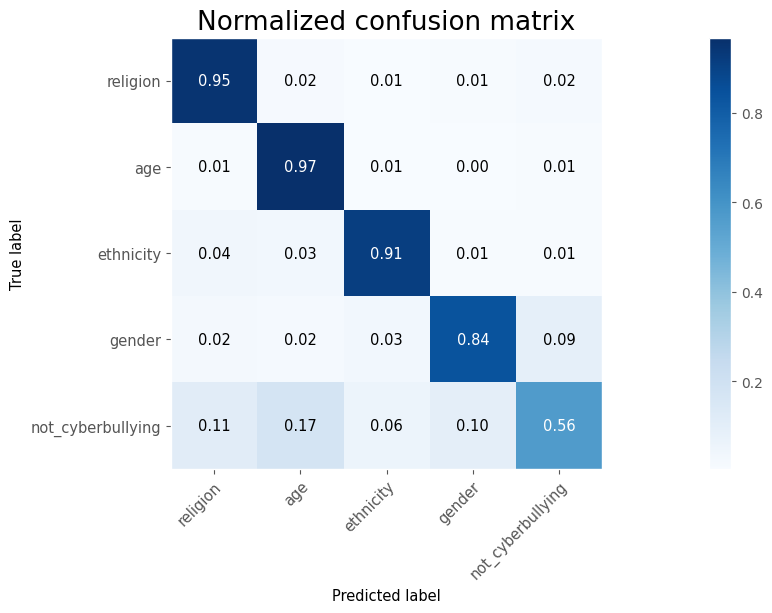

In [ ]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB().fit(train_x, train_y)
y_score = clf.predict(test_x)

print("Accuracy: %.2f%%" % (accuracy_score(test_y, y_score) * 100))

eval_report = classification_report(test_y, y_score, digits=5, labels=list(labels.values()), target_names=list(labels.keys()))
print(eval_report)

plot_confusion_matrix(test_y, y_score, classes=list(labels.keys()), normalize=True, magnify=0.1,);

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Accuracy: 92.74%
                   precision    recall  f1-score   support

         religion    0.95712   0.95513   0.95612      2407
              age    0.94973   0.97198   0.96073      2391
        ethnicity    0.98418   0.98166   0.98292      2345
           gender    0.93829   0.86491   0.90011      2391
not_cyberbullying    0.81440   0.86344   0.83821      2358

         accuracy                        0.92743     11892
        macro avg    0.92875   0.92743   0.92762     11892
     weighted avg    0.92889   0.92743   0.92769     11892

Normalized confusion matrix


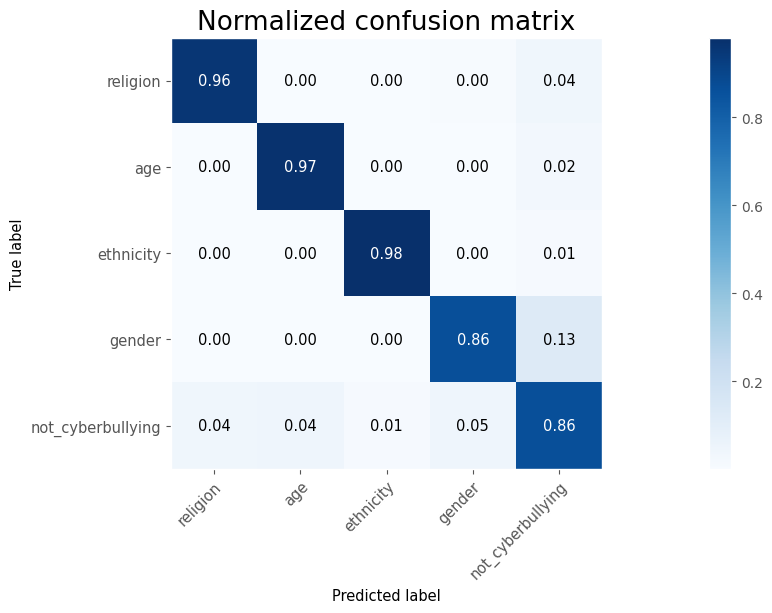

In [ ]:
from sklearn.svm import SVC

clf = SVC(kernel='linear').fit(train_x, train_y)
y_score = clf.predict(test_x)

print("Accuracy: %.2f%%" % (accuracy_score(test_y, y_score) * 100))

eval_report = classification_report(test_y, y_score, digits=5, labels=list(labels.values()), target_names=list(labels.keys()))
print(eval_report)

plot_confusion_matrix(test_y, y_score, classes=list(labels.keys()), normalize=True, magnify=0.1,);

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Accuracy: 92.78%
                   precision    recall  f1-score   support

         religion    0.96012   0.95015   0.95511      2407
              age    0.95215   0.97365   0.96278      2391
        ethnicity    0.99010   0.98081   0.98543      2345
           gender    0.95109   0.85404   0.89996      2391
not_cyberbullying    0.80000   0.88041   0.83828      2358

         accuracy                        0.92777     11892
        macro avg    0.93069   0.92781   0.92831     11892
     weighted avg    0.93086   0.92777   0.92838     11892

Normalized confusion matrix


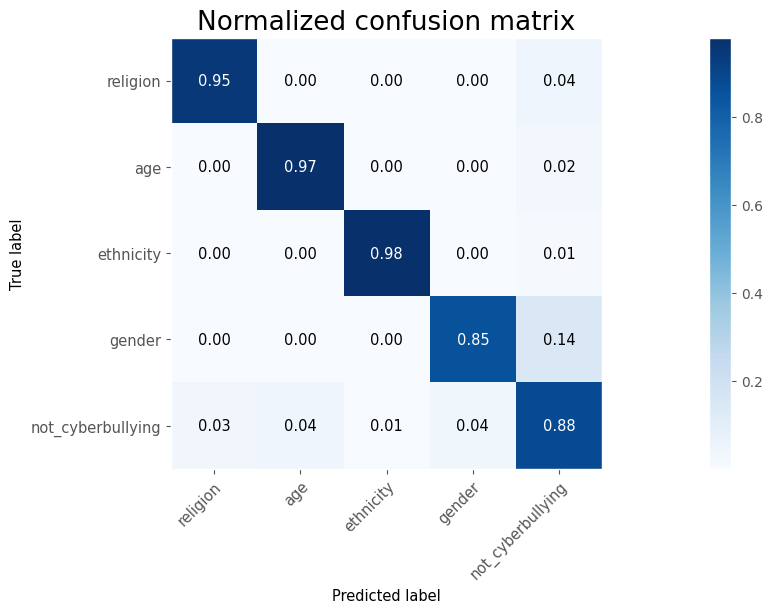

In [ ]:
clf = SVC().fit(train_x, train_y)
y_score = clf.predict(test_x)

print("Accuracy: %.2f%%" % (accuracy_score(test_y, y_score) * 100))

eval_report = classification_report(test_y, y_score, digits=5, labels=list(labels.values()), target_names=list(labels.keys()))
print(eval_report)

plot_confusion_matrix(test_y, y_score, classes=list(labels.keys()), normalize=True, magnify=0.1,);

# Random Forest

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Accuracy: 93.05%
                   precision    recall  f1-score   support

         religion    0.95863   0.95305   0.95583      2407
              age    0.98020   0.97323   0.97671      2391
        ethnicity    0.99054   0.98209   0.98630      2345
           gender    0.94327   0.84149   0.88948      2391
not_cyberbullying    0.79828   0.90288   0.84736      2358

         accuracy                        0.93046     11892
        macro avg    0.93418   0.93055   0.93114     11892
     weighted avg    0.93438   0.93046   0.93119     11892

Normalized confusion matrix


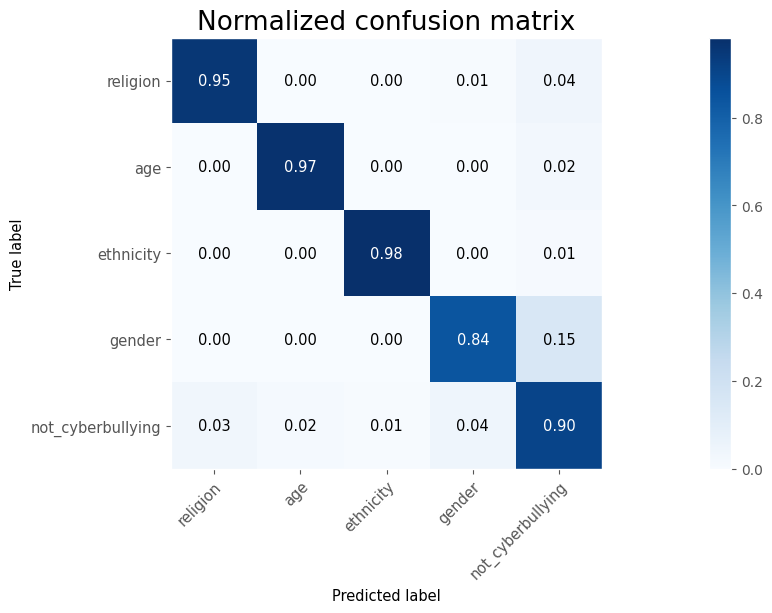

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier().fit(train_x, train_y)
y_score = clf.predict(test_x)

print("Accuracy: %.2f%%" % (accuracy_score(test_y, y_score) * 100))

eval_report = classification_report(test_y, y_score, digits=5, labels=list(labels.values()), target_names=list(labels.keys()))
print(eval_report)

plot_confusion_matrix(test_y, y_score, classes=list(labels.keys()), normalize=True, magnify=0.1,);

# Wav2Vec + XGBoost

In [ ]:
from gensim.models import Word2Vec
from nltk.tokenize import TweetTokenizer

tokenizer = TweetTokenizer(preserve_case=False,
                           strip_handles=True,
                           reduce_len=True)

class MeanEmbeddingVectorizer():
    def __init__(self, word2vec):
        self.word2vec = word2vec
        self.dim = len(next(iter(word2vec.values())))

    def transform(self, X):
        return np.array([np.mean([self.word2vec[w] for w in words if w in self.word2vec] or [np.zeros(self.dim)], axis=0) for words in X])

    def fit(self, X, y):
        return self

dt["tokenized"] = [tokenizer.tokenize(i) for i in dt['text']]
model = Word2Vec(dt["tokenized"], min_count=1)
w2v = dict(zip(model.wv.index_to_key, model.wv.vectors))
modelw = MeanEmbeddingVectorizer(w2v)

dt["cyberbullying_type_code"] = dt.cyberbullying_type.astype('category').cat.codes
dt["cyberbullying_type_code"].unique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/google/rpc/__init__.py:20: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google.rpc')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  pkg_resources.declare_namespace(__name__)
/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:2349: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred

array([3, 2, 4, 0, 1], dtype=int8)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dt["tokenized"],dt["cyberbullying_type_code"],test_size=0.2,shuffle=True, stratify=dt["cyberbullying_type"], random_state=32)

X_train_vectors_w2v = modelw.transform(X_train)
X_test_vectors_w2v = modelw.transform(X_test)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier(
    use_label_encoder=False,
    max_depth=4,
    min_child_weight=2,
    gamma=0.3,
    subsample=0.7,
    colsample_bytree=0.6,
    reg_alpha=0.1,
)
model.fit(X_train_vectors_w2v, y_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Accuracy: 0.8690716448032291
              precision    recall  f1-score   support

           0    0.94045   0.95810   0.94919      1599
           1    0.91760   0.92395   0.92076      1591
           2    0.86409   0.76311   0.81047      1583
           3    0.73162   0.78714   0.75836      1555
           4    0.89545   0.91000   0.90267      1600

    accuracy                        0.86907      7928
   macro avg    0.86984   0.86846   0.86829      7928
weighted avg    0.87058   0.86907   0.86897      7928

Normalized confusion matrix


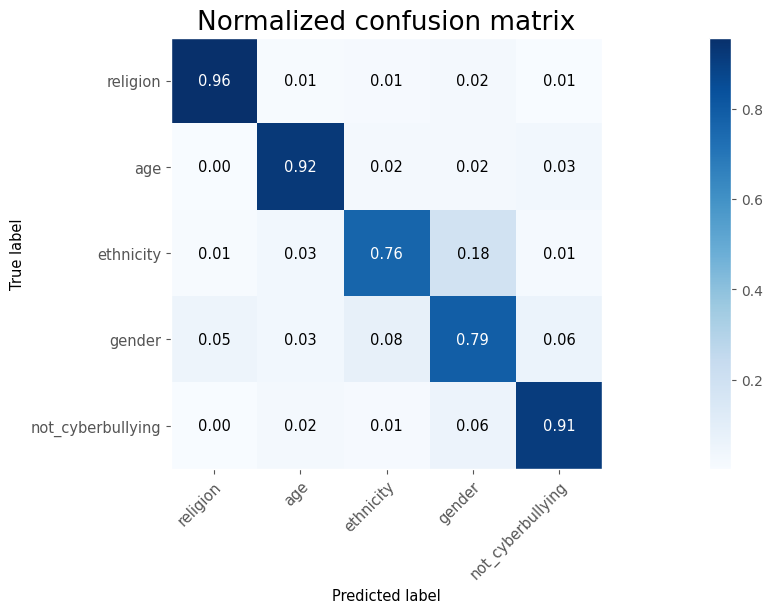

[[0.95809881 0.00562852 0.01063164 0.0206379  0.00500313]
 [0.00377121 0.9239472  0.02137021 0.02011314 0.03079824]
 [0.00758054 0.03095389 0.76310802 0.18445989 0.01389766]
 [0.0488746  0.02829582 0.07717042 0.78713826 0.0585209 ]
 [0.001875   0.01875    0.011875   0.0575     0.91      ]]


In [ ]:
predictions = model.predict(X_test_vectors_w2v)
print(f"Accuracy: {accuracy_score(y_test, predictions)}")
print(classification_report(y_test, predictions,  digits=5))
print(plot_confusion_matrix(y_test, predictions, classes=list(labels.keys()), normalize=True, magnify=0.1))

# GPT2

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
!pip install -q git+https://github.com/huggingface/transformers.git

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 52.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 60.2 MB/s eta 0:00:00


In [ ]:
import io
import os
import torch
import pandas as pd
from numpy.random import RandomState
from tqdm.notebook import tqdm
from torch.utils.data import Dataset, DataLoader
from ml_things import plot_dict, plot_confusion_matrix, fix_text
from sklearn.metrics import classification_report, accuracy_score
from transformers import (set_seed,
                          TrainingArguments,
                          Trainer,
                          GPT2Config,
                          GPT2Tokenizer,
                          AdamW,
                          get_linear_schedule_with_warmup,
                          GPT2ForSequenceClassification)


set_seed(456)

epochs = 8

batch_size = 32

max_length = 60

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model_name_or_path = 'gpt2'

labels_ids = {'religion': 0, 'age': 1, 'gender': 2, 'ethnicity': 3, 'not_cyberbullying': 4}

n_labels = len(labels_ids)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
class CyberbullyingDataset(Dataset):

  def __init__(self, df, use_tokenizer):

    self.texts = dt['tweet_text'].tolist()
    self.labels = dt['cyberbullying_type'].tolist()

    for text in self.texts:
      text = fix_text(text)

    print(self.texts)
    print(self.labels)

    self.n_examples = len(self.labels)
    return

  def __len__(self):
    return self.n_examples

  def __getitem__(self, item):
    return {'text':self.texts[item],
            'label':self.labels[item]}



class Gpt2ClassificationCollator(object):
    def __init__(self, use_tokenizer, labels_encoder, max_sequence_len=None):
        self.use_tokenizer = use_tokenizer
        self.max_sequence_len = use_tokenizer.model_max_length if max_sequence_len is None else max_sequence_len
        self.labels_encoder = labels_encoder
        return

    def __call__(self, sequences):
        texts = [sequence['text'] for sequence in sequences]
        labels = [sequence['label'] for sequence in sequences]
        labels = [self.labels_encoder[label] for label in labels]
        inputs = self.use_tokenizer(text=texts, return_tensors="pt", padding=True, truncation=True,  max_length=self.max_sequence_len)
        inputs.update({'labels':torch.tensor(labels)})
        return inputs



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def train(dataloader, optimizer_, scheduler_, device_):
  global model
  predictions_labels = []
  true_labels = []
  total_loss = 0
  model.train()
  for batch in tqdm(dataloader, total=len(dataloader)):
    true_labels += batch['labels'].numpy().flatten().tolist()
    batch = {k:v.type(torch.long).to(device_) for k,v in batch.items()}
    model.zero_grad()
    outputs = model(**batch)
    loss, logits = outputs[:2]
    total_loss += loss.item()
    loss.backward()
    torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
    optimizer_.step()
    scheduler_.step()
    logits = logits.detach().cpu().numpy()
    predictions_labels += logits.argmax(axis=-1).flatten().tolist()
  avg_epoch_loss = total_loss / len(dataloader)
  return true_labels, predictions_labels, avg_epoch_loss

def validation(dataloader, device_):
  global model
  predictions_labels = []
  true_labels = []
  total_loss = 0
  model.eval()
  for batch in tqdm(dataloader, total=len(dataloader)):
    true_labels += batch['labels'].numpy().flatten().tolist()
    batch = {k:v.type(torch.long).to(device_) for k,v in batch.items()}
    with torch.no_grad():
        outputs = model(**batch)
        loss, logits = outputs[:2]
        logits = logits.detach().cpu().numpy()
        total_loss += loss.item()
        predict_content = logits.argmax(axis=-1).flatten().tolist()
        predictions_labels += predict_content
  avg_epoch_loss = total_loss / len(dataloader)
  return true_labels, predictions_labels, avg_epoch_loss

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print('Loading configuration...')
model_config = GPT2Config.from_pretrained(pretrained_model_name_or_path=model_name_or_path, num_labels=n_labels)

print('Loading tokenizer...')
tokenizer = GPT2Tokenizer.from_pretrained(pretrained_model_name_or_path=model_name_or_path)
tokenizer.padding_side = "left"
tokenizer.pad_token = tokenizer.eos_token


print('Loading model...')
model = GPT2ForSequenceClassification.from_pretrained(pretrained_model_name_or_path=model_name_or_path, config=model_config)
model.resize_token_embeddings(len(tokenizer))
model.config.pad_token_id = model.config.eos_token_id
model.to(device)
print('Model loaded to `%s`'%device)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Loading configuration...


Loading tokenizer...


Loading model...


Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model loaded to `cuda`


In [ ]:
rng = RandomState()

train = dt.sample(frac=0.7, random_state=rng)
test = dt.loc[~dt.index.isin(train.index)]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
gpt2_classificaiton_collator = Gpt2ClassificationCollator(use_tokenizer=tokenizer,
                                                          labels_encoder=labels_ids,
                                                          max_sequence_len=max_length)

print('Dealing with Train...')
train_dataset = CyberbullyingDataset(df=train,
                               use_tokenizer=tokenizer)
print('Created `train_dataset` with %d examples!'%len(train_dataset))
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True,
                              collate_fn=gpt2_classificaiton_collator)
print('Created `train_dataloader` with %d batches!'%len(train_dataloader))
print()
print('Dealing with Validation...')
valid_dataset =  CyberbullyingDataset(df=test,
                               use_tokenizer=tokenizer)
print('Created `valid_dataset` with %d examples!'%len(valid_dataset))
valid_dataloader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False,
                              collate_fn=gpt2_classificaiton_collator)
print('Created `eval_dataloader` with %d batches!'%len(valid_dataloader))

Dealing with Train...


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Epoch


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  0%|          | 0/8 [00:00<?, ?it/s]


Training on batches...


  0%|          | 0/1239 [00:00<?, ?it/s]

Validation on batches...


  0%|          | 0/1239 [00:00<?, ?it/s]

  train_loss: 0.70446 - val_loss: 0.42928 - train_acc: 0.73987 - valid_acc: 0.83927


Training on batches...


  0%|          | 0/1239 [00:00<?, ?it/s]

Validation on batches...


  0%|          | 0/1239 [00:00<?, ?it/s]

  train_loss: 0.41170 - val_loss: 0.36059 - train_acc: 0.84464 - valid_acc: 0.86112


Training on batches...


  0%|          | 0/1239 [00:00<?, ?it/s]

Validation on batches...


  0%|          | 0/1239 [00:00<?, ?it/s]

  train_loss: 0.35763 - val_loss: 0.34097 - train_acc: 0.86261 - valid_acc: 0.87194


Training on batches...


  0%|          | 0/1239 [00:00<?, ?it/s]

Validation on batches...


  0%|          | 0/1239 [00:00<?, ?it/s]

  train_loss: 0.33000 - val_loss: 0.32530 - train_acc: 0.87631 - valid_acc: 0.87565


Training on batches...


  0%|          | 0/1239 [00:00<?, ?it/s]

Validation on batches...


  0%|          | 0/1239 [00:00<?, ?it/s]

  train_loss: 0.32311 - val_loss: 0.32363 - train_acc: 0.87532 - valid_acc: 0.88107


Training on batches...


  0%|          | 0/1239 [00:00<?, ?it/s]

Validation on batches...


  0%|          | 0/1239 [00:00<?, ?it/s]

  train_loss: 0.32359 - val_loss: 0.30817 - train_acc: 0.87565 - valid_acc: 0.88589


Training on batches...


  0%|          | 0/1239 [00:00<?, ?it/s]

Validation on batches...


  0%|          | 0/1239 [00:00<?, ?it/s]

  train_loss: 0.31756 - val_loss: 0.30061 - train_acc: 0.87921 - valid_acc: 0.88705


Training on batches...


  0%|          | 0/1239 [00:00<?, ?it/s]

Validation on batches...


  0%|          | 0/1239 [00:00<?, ?it/s]

  train_loss: 0.30984 - val_loss: 0.30314 - train_acc: 0.88264 - valid_acc: 0.88743



/usr/local/lib/python3.10/dist-packages/ml_things/plot_functions.py:409: DeprecationWarning: `magnify` needs to have value in [0,1]! `1.2` will be converted to `0.1` as default.
  warnings.warn(f'`magnify` needs to have value in [0,1]! `{magnify}` will be converted to `0.1` as default.',


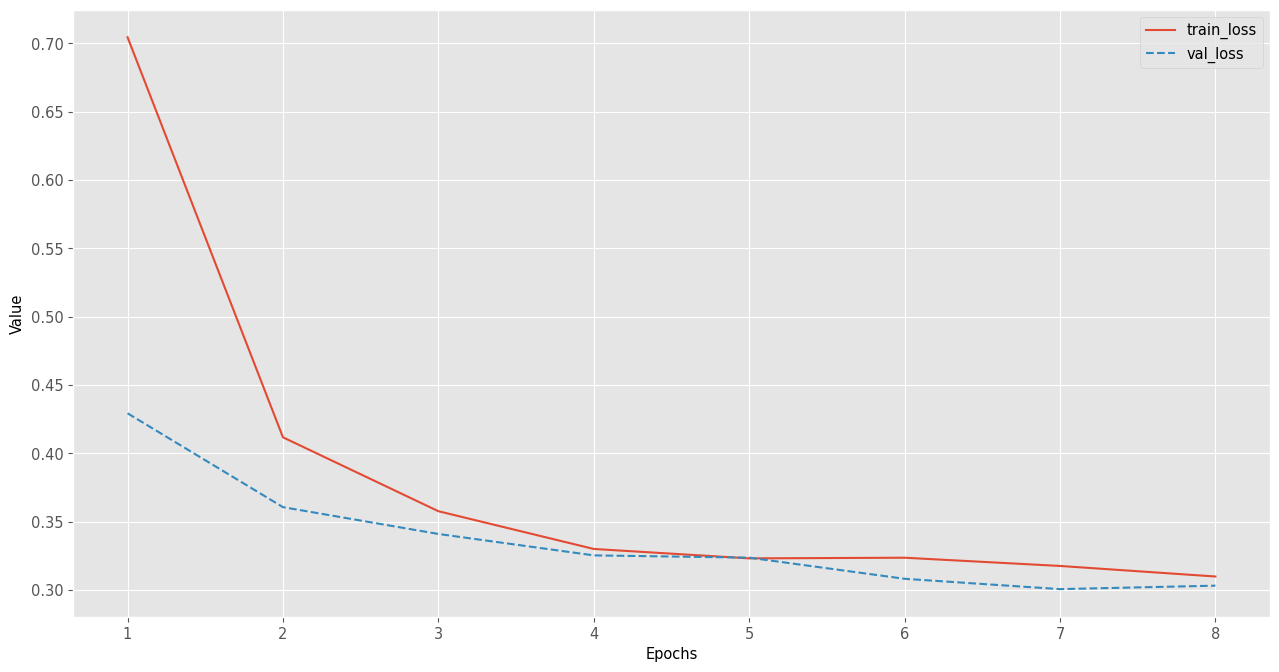

/usr/local/lib/python3.10/dist-packages/ml_things/plot_functions.py:409: DeprecationWarning: `magnify` needs to have value in [0,1]! `1.2` will be converted to `0.1` as default.
  warnings.warn(f'`magnify` needs to have value in [0,1]! `{magnify}` will be converted to `0.1` as default.',


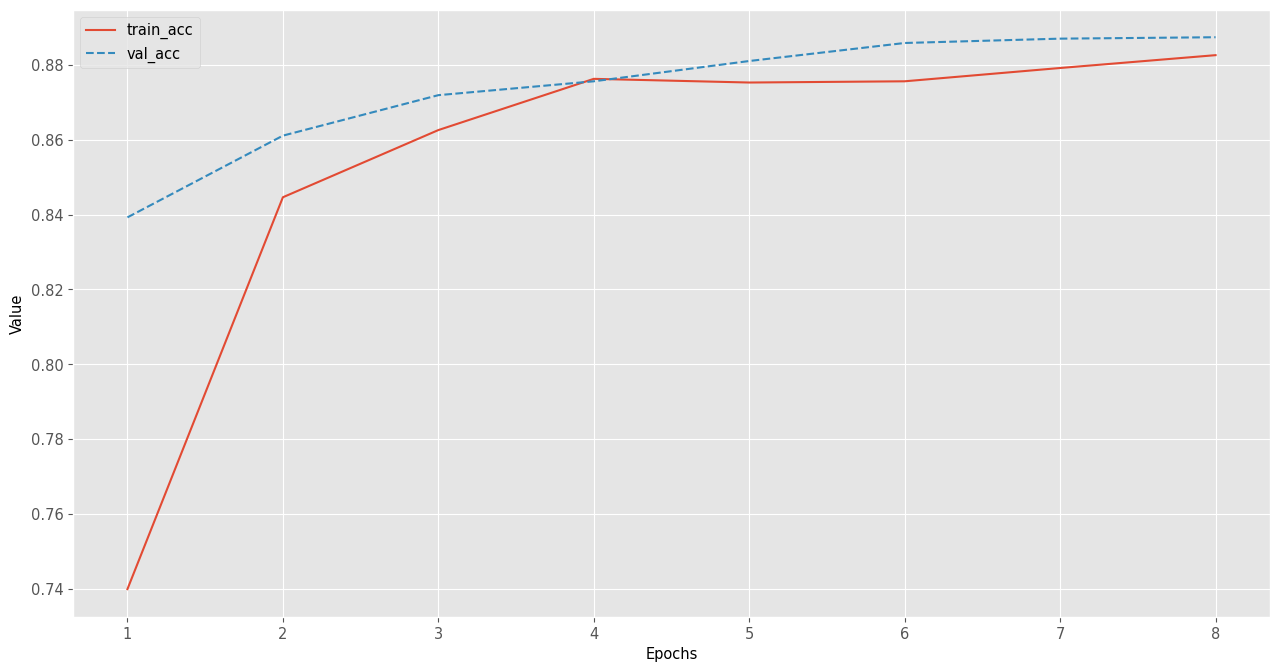

In [ ]:
optimizer = AdamW(model.parameters(),
                  lr = 2e-5,
                  eps = 1e-8
                  )

total_steps = len(train_dataloader) * epochs
scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps = 0,
                                            num_training_steps = total_steps)

all_loss = {'train_loss':[], 'val_loss':[]}
all_acc = {'train_acc':[], 'val_acc':[]}

print('Epoch')
for epoch in tqdm(range(epochs)):
  print()
  print('Training on batches...')
  train_labels, train_predict, train_loss = train(train_dataloader, optimizer, scheduler, device)
  train_acc = accuracy_score(train_labels, train_predict)
  print('Validation on batches...')
  valid_labels, valid_predict, val_loss = validation(valid_dataloader, device)
  val_acc = accuracy_score(valid_labels, valid_predict)

  print("  train_loss: %.5f - val_loss: %.5f - train_acc: %.5f - valid_acc: %.5f"%(train_loss, val_loss, train_acc, val_acc))
  print()

  all_loss['train_loss'].append(train_loss)
  all_loss['val_loss'].append(val_loss)
  all_acc['train_acc'].append(train_acc)
  all_acc['val_acc'].append(val_acc)

plot_dict(all_loss, use_xlabel='Epochs', use_ylabel='Value', use_linestyles=['-', '--'])

plot_dict(all_acc, use_xlabel='Epochs', use_ylabel='Value', use_linestyles=['-', '--'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  0%|          | 0/1239 [00:00<?, ?it/s]

Accuracy: 88.74%
                   precision    recall  f1-score   support

         religion    0.89300   0.94761   0.91949      7997
              age    0.93209   0.94807   0.94002      7992
           gender    0.84097   0.86232   0.85151      7917
        ethnicity    0.92985   0.91629   0.92302      7956
not_cyberbullying    0.83567   0.75926   0.79563      7776

         accuracy                        0.88743     39638
        macro avg    0.88632   0.88671   0.88593     39638
     weighted avg    0.88664   0.88743   0.88646     39638

Normalized confusion matrix


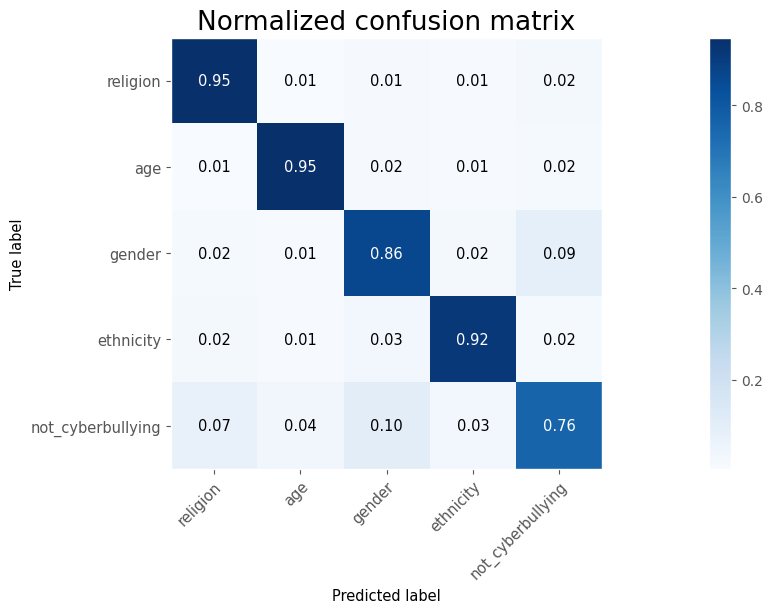

In [ ]:
true_labels, predictions_labels, avg_epoch_loss = validation(valid_dataloader, device)

acc = accuracy_score(true_labels, predictions_labels) * 100
print("Accuracy: %.2f%%" % (acc))

evaluation_report = classification_report(true_labels, predictions_labels, digits=5, labels=list(labels_ids.values()), target_names=list(labels_ids.keys()))
print(evaluation_report)

plot_confusion_matrix(y_true=true_labels, y_pred=predictions_labels,
                      classes=list(labels_ids.keys()), normalize=True,
                      magnify=0.1,
                      );